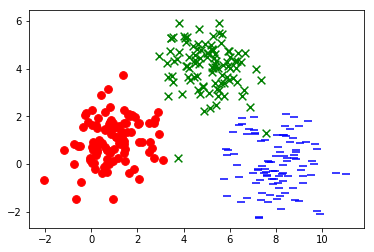

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)

In [20]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))

xs = np.vstack((xs_label0, xs_label1, xs_label2))
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + 
                   [[0., 1., 0.]] * len(x1_label1) +
                   [[0., 0., 1.]] * len(x1_label2))

arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * len(test_x1_label0) + 
                   [[0., 1., 0.]] * len(test_x1_label1) +
                   [[0., 0., 1.]] * len(test_x1_label2))

In [22]:
import tensorflow as tf

train_size, num_features = xs.shape

X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])

W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        if step % 100 == 0:
            print(step, err)
            
    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))

0 109.861
100 7.84031
200 5.44239
300 6.95096


400 5.73721
500 4.17632
600 6.35884
700 5.14334


800 3.75486
900 6.17197
1000 4.75482
1100 3.53766


1200 6.09323
1300 4.45486
1400 3.40218
1500 6.05748


1600 4.20814
1700 3.3077
1800 6.04212
1900 3.99871


2000 3.23666
2100 6.03735
2200 3.81762
2300 3.18027


2400 6.03829
2500 3.65906
2600 3.13364
2700 6.04232


2800 3.51893
2900 3.09387
w [[-2.56364679  0.53376937  2.02988529]
 [-0.01570386  1.54288197 -1.5271765 ]]
b [ 9.80528164 -3.60037541 -6.20486784]
accuracy 1.0
